In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv(r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\7 Semestre\Astronomia Galactica\Practica 10\messier.csv")
df.shape

(112, 10)

In [24]:
df

,nombre,numero,ngc,con,Tipo,AR,DE,V,D,dist
0,M110,110,205,And,6,00:40.4,+41:41,8.5,17x10,2900.000
1,M31,031,224,And,5,00:42.7,+41:16,3.4,178x63,2900.000
2,M32,032,221,And,6,00:42.7,+40:52,8.1,8x6,2900.000
3,M103,103,581,Cas,1,01:33.2,+60:42,7.4,6.0,8.500
4,M33,033,598,Tri,5,01:33.9,+30:39,5.7,73x45,3000.000
...,...,...,...,...,...,...,...,...,...,...
107,M15,015,7078,Peg,2,21:30.0,+12:10,6.2,12.3,33.600
108,M39,039,7092,Cyg,1,21:32.2,+48:26,4.6,32.0,0.825
109,M2,002,7089,Aqr,2,21:33.5,-00:49,6.5,12.9,37.500
110,M30,030,7099,Cap,2,21:40.4,-23:11,7.2,11.0,26.100


In [25]:
def filter_tipo(df):
    # Convert the "Tipo" column to numeric (assuming it contains numeric values)
    df['Tipo'] = pd.to_numeric(df['Tipo'], errors='coerce')
    # Drop rows where the "Tipo" column value is greater than 2
    df_filtered = df[df['Tipo'] >= 5]
    df_filtered = df[df['Tipo'] <= 8]
    return df_filtered

# Apply the filtering function
df = filter_tipo(df)
df

,nombre,numero,ngc,con,Tipo,AR,DE,V,D,dist
0,M110,110,205,And,6.0,00:40.4,+41:41,8.5,17x10,2900.000
1,M31,031,224,And,5.0,00:42.7,+41:16,3.4,178x63,2900.000
2,M32,032,221,And,6.0,00:42.7,+40:52,8.1,8x6,2900.000
3,M103,103,581,Cas,1.0,01:33.2,+60:42,7.4,6.0,8.500
4,M33,033,598,Tri,5.0,01:33.9,+30:39,5.7,73x45,3000.000
...,...,...,...,...,...,...,...,...,...,...
107,M15,015,7078,Peg,2.0,21:30.0,+12:10,6.2,12.3,33.600
108,M39,039,7092,Cyg,1.0,21:32.2,+48:26,4.6,32.0,0.825
109,M2,002,7089,Aqr,2.0,21:33.5,-00:49,6.5,12.9,37.500
110,M30,030,7099,Cap,2.0,21:40.4,-23:11,7.2,11.0,26.100


In [26]:
def convert_to_hours(time_str):
    # Split the time string into hours and minutes
    hours, minutes = map(float, time_str.split(':'))
    # Calculate the fraction of hour for minutes
    fraction_hour = minutes / 60
    # Sum the hours and fraction of hour
    total_hours = hours + fraction_hour
    return total_hours

# Apply the conversion function to the "AR" column
df['AR'] = df['AR'].apply(convert_to_hours)
df

C:\Users\juang\AppData\Local\Temp/ipykernel_13296/486080260.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AR'] = df['AR'].apply(convert_to_hours)


,nombre,numero,ngc,con,Tipo,AR,DE,V,D,dist
0,M110,110,205,And,6.0,0.673333,+41:41,8.5,17x10,2900.000
1,M31,031,224,And,5.0,0.711667,+41:16,3.4,178x63,2900.000
2,M32,032,221,And,6.0,0.711667,+40:52,8.1,8x6,2900.000
3,M103,103,581,Cas,1.0,1.553333,+60:42,7.4,6.0,8.500
4,M33,033,598,Tri,5.0,1.565000,+30:39,5.7,73x45,3000.000
...,...,...,...,...,...,...,...,...,...,...
107,M15,015,7078,Peg,2.0,21.500000,+12:10,6.2,12.3,33.600
108,M39,039,7092,Cyg,1.0,21.536667,+48:26,4.6,32.0,0.825
109,M2,002,7089,Aqr,2.0,21.558333,-00:49,6.5,12.9,37.500
110,M30,030,7099,Cap,2.0,21.673333,-23:11,7.2,11.0,26.100


In [27]:
list(df["DE"])[0][0]

'+'

In [28]:
# Define a function to convert the string time format to a float degree value
def convert_to_degrees(time_str):
    signo=time_str[0]
    # Split the time string into sign, degrees, and minutes
    degrees, minutes =  map(float, time_str[1:].split(':'))
    # Calculate the fraction of degree for minutes
    fraction_degree = minutes / 60
    if signo=="-":
        total_degrees = -1 * (degrees + fraction_degree)
    else:
        total_degrees = (degrees + fraction_degree)
    return total_degrees

# Apply the conversion function to the "DE" column
df['DE'] = df['DE'].apply(convert_to_degrees)

# Print the resulting DataFrame with the new "DE_float" column
df

C:\Users\juang\AppData\Local\Temp/ipykernel_13296/1762175507.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DE'] = df['DE'].apply(convert_to_degrees)


,nombre,numero,ngc,con,Tipo,AR,DE,V,D,dist
0,M110,110,205,And,6.0,0.673333,41.683333,8.5,17x10,2900.000
1,M31,031,224,And,5.0,0.711667,41.266667,3.4,178x63,2900.000
2,M32,032,221,And,6.0,0.711667,40.866667,8.1,8x6,2900.000
3,M103,103,581,Cas,1.0,1.553333,60.700000,7.4,6.0,8.500
4,M33,033,598,Tri,5.0,1.565000,30.650000,5.7,73x45,3000.000
...,...,...,...,...,...,...,...,...,...,...
107,M15,015,7078,Peg,2.0,21.500000,12.166667,6.2,12.3,33.600
108,M39,039,7092,Cyg,1.0,21.536667,48.433333,4.6,32.0,0.825
109,M2,002,7089,Aqr,2.0,21.558333,-0.816667,6.5,12.9,37.500
110,M30,030,7099,Cap,2.0,21.673333,-23.183333,7.2,11.0,26.100


In [29]:
#df_tipo_4 = df[df['Tipo'] == 4]
df_tipo_5 = df[df['Tipo'] == 5]
df_tipo_6 = df[df['Tipo'] == 6]
df_tipo_7 = df[df['Tipo'] == 7]
df_tipo_8 = df[df['Tipo'] == 8]


In [30]:
#AR_4=df_tipo_4["AR"]
AR_5=df_tipo_5["AR"]
AR_6=df_tipo_6["AR"]
AR_7=df_tipo_7["AR"]
AR_8=df_tipo_8["AR"]
#DE_4=df_tipo_4["DE"]
DE_5=df_tipo_5["DE"]
DE_6=df_tipo_6["DE"]
DE_7=df_tipo_7["DE"]
DE_8=df_tipo_8["DE"]


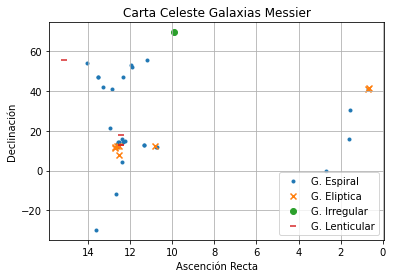

In [32]:
#plt.scatter(AR_4, DE_4,label="C Abiertos")
plt.scatter(AR_5, DE_5, marker=".",label="G. Espiral")
plt.scatter(AR_6, DE_6,marker="x",label="G. Eliptica")
plt.scatter(AR_7, DE_7, marker="o",label="G. Irregular")
plt.scatter(AR_8, DE_8,marker="_",label="G. Lenticular")

plt.ylabel("Declinación")
plt.xlabel("Ascención Recta")
plt.title("Carta Celeste Galaxias Messier")
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)
plt.show()